## Predicting Diabetes with Logistic Regression

Here, I am going to predict if people have diabetes based on features in the 'diabetes-dataset'. 

In [49]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, bernoulli, beta, norm
from scipy.special import expit as logistic_sigmoid
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [50]:
df = pd.read_csv('diabetes-dataset.csv')

In [51]:
print(df)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1    

In [52]:
# Define dependent values
Y = df['Outcome']

# Define independent values
X = df[[col for col in df.columns if col != 'Outcome']]

# Clean missing values
Y = Y.dropna()
X = X.dropna()

# Add an intercept
X_with_intercept = sm.add_constant(X)

print(Y)
print(X_with_intercept)

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64
      const  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0       1.0            2      138             62             35        0   
1       1.0            0       84             82             31      125   
2       1.0            0      145              0              0        0   
3       1.0            0      135             68             42      250   
4       1.0            1      139             62             41      480   
...     ...          ...      ...            ...            ...      ...   
1995    1.0            2       75             64             24       55   
1996    1.0            8      179             72             42      130   
1997    1.0            6       85             78              0        0   
1998    1.0            0      129            110             46      130   
1999    1.0 

#### The `Homogeneous Probability` model:

In [53]:
# Fit the model 
intercept = X_with_intercept['const']
model = sm.Logit(Y,intercept)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.642353
         Iterations 4


In [54]:
# Get summary results
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1999
Method:                           MLE   Df Model:                            0
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:               6.453e-11
Time:                        22:40:03   Log-Likelihood:                -1284.7
converged:                       True   LL-Null:                       -1284.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6544      0.047    -13.883      0.000      -0.747      -0.562


In [55]:
# Extract the coefficients (betas) and their covariance matrix from the logistic regression fit

# Extract the coefficients (betas)
coefficients = results.params
print(f"{coefficients}")

# Extract the covariance matrix of the coefficients
covariance_matrix = results.cov_params()
print(f"\n{covariance_matrix}")

const   -0.654394
dtype: float64

          const
const  0.002222


In [56]:
# Number of simulations
num_simulations = 1000

# Simulate beta coefficients:

# on the log-odds scale
simulated_log_odds = np.random.normal(loc= coefficients, scale=covariance_matrix['const'], size=num_simulations)

# on the odds scale
simulated_odds = np.exp(simulated_log_odds)

# on the probability scale
simulated_prob = logistic_sigmoid(simulated_odds)


In [57]:
print(simulated_prob)

[0.62689404 0.62700258 0.62680573 0.62717834 0.62700606 0.6270275
 0.6268606  0.62677462 0.62677276 0.62729003 0.62734951 0.6268438
 0.62721737 0.62700825 0.62703998 0.62707188 0.62677604 0.62770863
 0.62657706 0.62701059 0.6270151  0.62700022 0.62749494 0.62681935
 0.62744715 0.62671946 0.6273131  0.62726686 0.62672836 0.62694177
 0.62696249 0.62721603 0.62655705 0.62763557 0.62692751 0.62676568
 0.62725316 0.62734999 0.6274066  0.62700846 0.62739367 0.62756479
 0.6269934  0.62723156 0.62731903 0.62678976 0.62674945 0.62731462
 0.62725235 0.62662325 0.62669729 0.62720675 0.62700702 0.62701656
 0.62705206 0.62699835 0.62696689 0.627052   0.62704258 0.62687192
 0.62740602 0.62657282 0.62711989 0.62717606 0.62721313 0.6268858
 0.62681306 0.6268647  0.6269908  0.62686952 0.62714183 0.62668906
 0.62723309 0.62733956 0.62714873 0.62731451 0.62708781 0.62737543
 0.62718186 0.62715389 0.62704559 0.62672456 0.62729165 0.62704205
 0.62696069 0.62734262 0.62748474 0.62720973 0.62738506 0.6268876

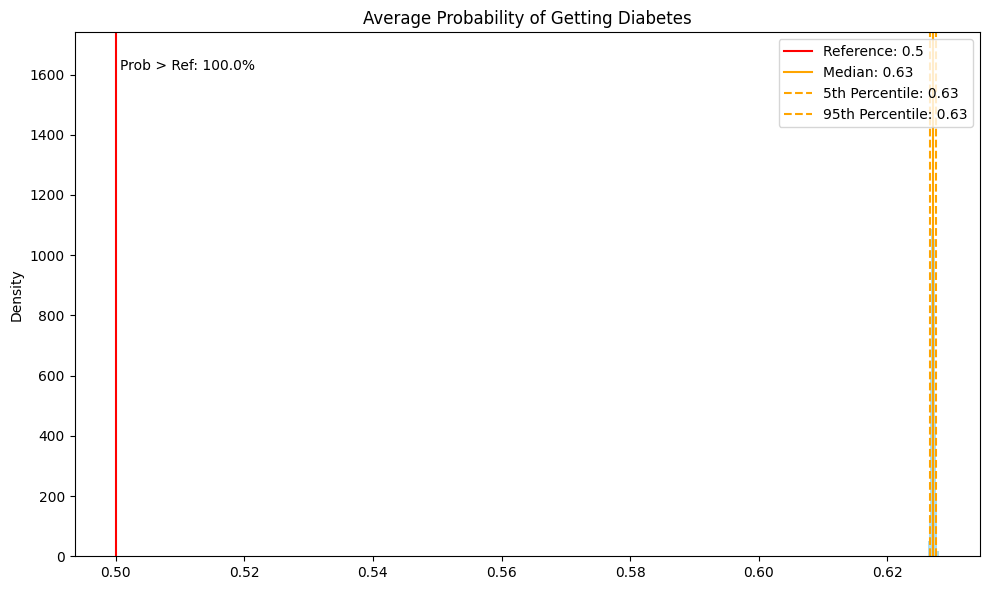

In [ ]:
# Calculate statistics for each coefficient
medians = np.median(simulated_prob, axis=0)
lower_quantiles = np.percentile(simulated_prob, 5, axis=0)
upper_quantiles = np.percentile(simulated_prob, 95, axis=0)
references = 0.5  # Reference values for probability
prob_positive = np.mean(simulated_prob) > references


# Plot names 
col_names = 'Probability'

# Plot histograms of each metric
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(simulated_prob, bins=30, density=True, alpha=0.7, color='skyblue')

# Add vertical lines for reference, median, and 90% interval
ax.axvline(references, color='red', linestyle='-', label=f'Reference: {references}')
ax.axvline(medians, color='orange', linestyle='-', label=f'Median: {medians:.2f}')
ax.axvline(lower_quantiles, color='orange', linestyle='--', label=f'5th Percentile: {lower_quantiles:.2f}')
ax.axvline(upper_quantiles, color='orange', linestyle='--', label=f'95th Percentile: {upper_quantiles:.2f}')
ax.text(0.05, 0.95, f'Prob > Ref: {prob_positive*100:.1f}%', transform=ax.transAxes, verticalalignment='top')

ax.set_title(f'Average {col_names} of Getting Diabetes')
ax.set_ylabel('Density')
ax.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

**Interpret**:

The red reference line at 0.5 represents a threshold probability, and the fact that 100.0% of the values are above this indicates that observations have a higher-than-threshold likelihood of diabetes. The median (orange line) at 0.63 is the middle value of the distribution, meaning half the probabilities are below 0.63 and half are above. The 5th and 95th percentiles, both at 0.63, indicate that 90% of the data falls within this narrow range, reflecting extremely low variability. The density peak at 0.63 signifies that most probabilities are clustered around this value, highlighting strong central tendency and uniformity in the dataset.

#### Get the AIC of this model

In [59]:
# Extract the AIC value
aic_value = results.aic
print(f"The AIC of the homogeneous probability model is: {aic_value:.2f}")

The AIC of the homogeneous probability model is: 2571.41


#### The `Heterogeneous Probability` model with multiple covariates and interactions:

In [60]:
# Fit the model with prepared X and the intercept
x = X_with_intercept
model = sm.Logit(Y, x)
results = model.fit()

# Get summary results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.478583
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1991
Method:                           MLE   Df Model:                            8
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.2550
Time:                        22:40:03   Log-Likelihood:                -957.17
converged:                       True   LL-Null:                       -1284.7
Covariance Type:            nonrobust   LLR p-value:                3.333e-136
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.0265      0.431    -18.639      0.000      -8.870

#### Simulate the approximate posterior of each coefficient, and plot the histogram of each respective coefficient on the odds-scale:

In [61]:
# Extract the coefficients (betas) and their covariance matrix from the logistic regression fit

# Extract the coefficients (betas)
coefficients = results.params
print(f"{coefficients}")

# Extract the covariance matrix of the coefficients
covariance_matrix = results.cov_params()
print(f"\n{covariance_matrix}")

const                      -8.026451
Pregnancies                 0.126384
Glucose                     0.033720
BloodPressure              -0.009645
SkinThickness               0.000519
Insulin                    -0.001243
BMI                         0.077555
DiabetesPedigreeFunction    0.887758
Age                         0.012941
dtype: float64

                             const   Pregnancies       Glucose  BloodPressure  \
const                     0.185446 -4.444404e-04 -4.925171e-04  -3.388298e-04   
Pregnancies              -0.000444  3.999862e-04  4.963832e-06  -6.063598e-06   
Glucose                  -0.000493  4.963832e-06  4.954279e-06  -5.252259e-07   
BloodPressure            -0.000339 -6.063598e-06 -5.252259e-07   1.052451e-05   
SkinThickness             0.000027  5.014447e-07  1.365756e-06  -2.215049e-06   
Insulin                   0.000039  2.355649e-08 -4.551510e-07   5.061097e-08   
BMI                      -0.002122  1.258823e-05 -9.801590e-07  -4.778359e-06   
Dia

In [62]:
# Simulate values of each regression coefficient from the posterior distirbution 

# Number of simulations
num_simulations = 1000
# Simulate beta coefficients
simulated_coefficients = np.random.multivariate_normal(coefficients, covariance_matrix, size=num_simulations)

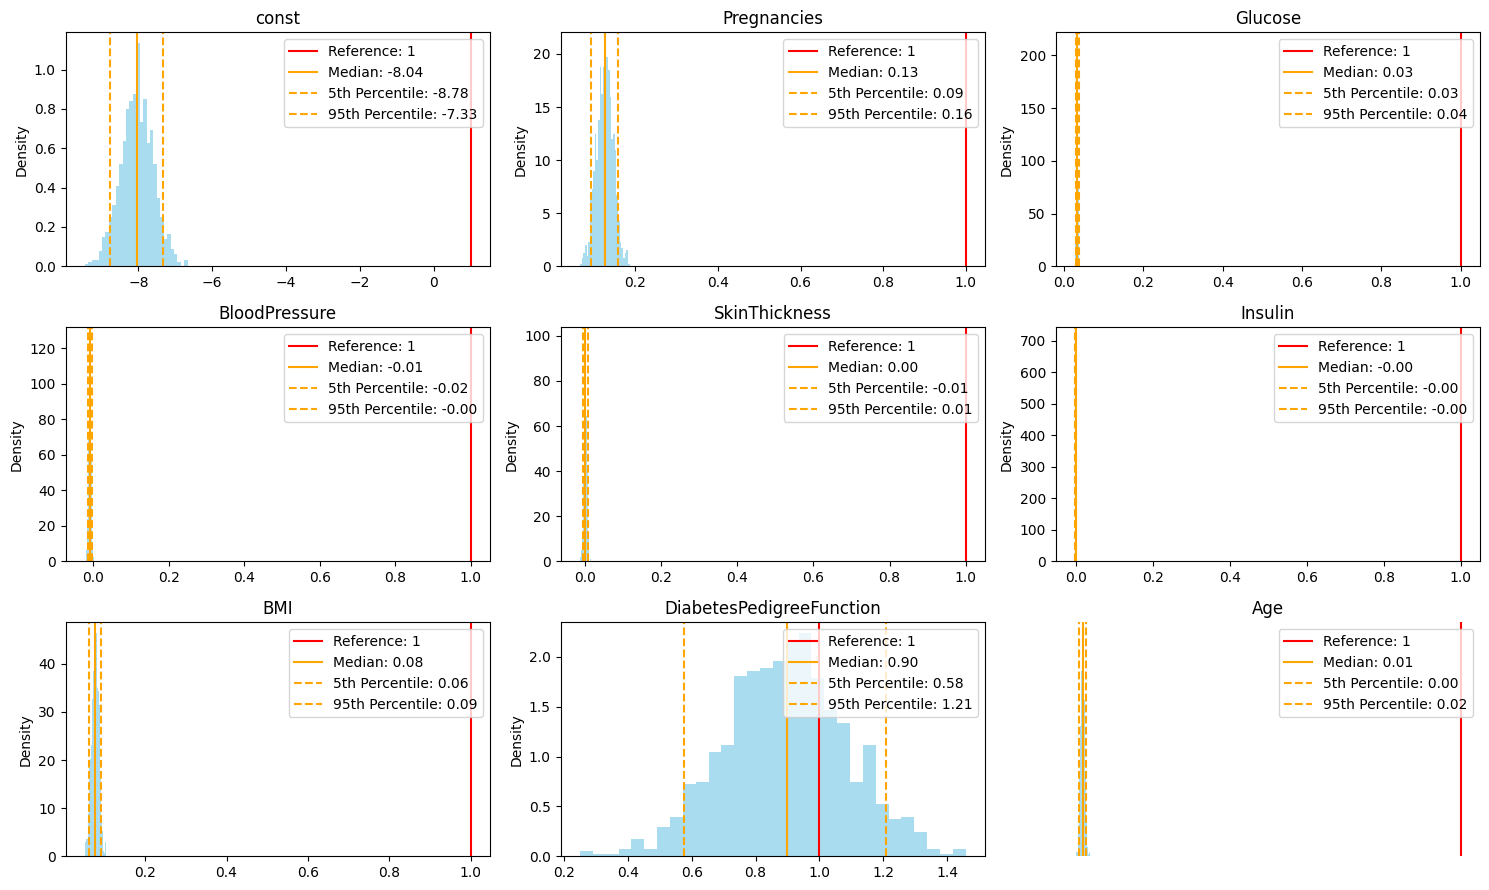

In [63]:
# Calculate statistics for each coefficient
medians = np.median(simulated_coefficients, axis=0)
lower_quantiles = np.percentile(simulated_coefficients, 5, axis=0)
upper_quantiles = np.percentile(simulated_coefficients, 95, axis=0)
references = [1, 1, 1, 1, 1, 1, 1, 1, 1]  # Reference values for log-odds, odds, probability
prob_positive = [np.mean(simulated_coefficients[:, i] > references[i]) for i in range(3)]


# Plot names 
col_names = ['const','Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
# Plot histograms of each coefficient
fig, axs = plt.subplots(3, 3, figsize=(15, 9))  # Adjust for the number of metrics
axs = axs.flatten()

for i in range(len(col_names)):
    ax = axs[i]
    ax.hist(simulated_coefficients[:, i], bins=30, density=True, alpha=0.7, color='skyblue')
    
    # Add vertical lines for reference, median, and 90% interval
    ax.axvline(references[i], color='red', linestyle='-', label=f'Reference: {references[i]}')
    ax.axvline(medians[i], color='orange', linestyle='-', label=f'Median: {medians[i]:.2f}')
    ax.axvline(lower_quantiles[i], color='orange', linestyle='--', label=f'5th Percentile: {lower_quantiles[i]:.2f}')
    ax.axvline(upper_quantiles[i], color='orange', linestyle='--', label=f'95th Percentile: {upper_quantiles[i]:.2f}')
    
    ax.set_title(f'{col_names[i]}')
    ax.set_ylabel('Density')
    ax.legend(loc='upper right')

# Hide empty subplot for uneven number of metrics
if len(col_names) % 2 != 0:
    axs[-1].axis('off')
    
plt.tight_layout()
plt.show()

***Interpret***:

const:<br>
Median: Around -8.02.<br>
The distribution is centered near -8, with very little spread.<br>
No values approach the reference line.<br>
<br><br>
Pregnancies:<br>
Median: 0.13.<br>
Most values fall between 0.09 and 0.16, with a very tight spread.<br>
The reference line is far outside the observed range.<br>
<br><br>
Glucose:<br>
Median: 0.03.<br>
Distribution is narrowly concentrated near 0.03, with minimal variation.<br>
<br><br>
BloodPressure:<br>
Median: -0.01.<br>
Data is tightly concentrated around -0.01, with negligible variability.<br>
<br><br>
SkinThickness:<br>
Median: 0.00.<br>
The distribution shows no significant spread, centered very close to 0.<br>
<br><br>
Insulin:<br>
Median: 0.00.<br>
Distribution is nearly flat and concentrated near 0.<br>
<br><br>
BMI:<br>
Median: 0.08.<br>
Most values fall between 0.06 and 0.09, showing a slightly wider spread compared to other features.<br>
<br><br>
DiabetesPedigreeFunction:<br>
Median: 0.90.<br>
This distribution is distinct with a broader spread, ranging between 0.59 and 1.18.<br>
Some values approach or even surpass the reference value.<br>
<br><br>
Age:<br>
Median: 0.01.<br>
Extremely narrow distribution close to 0.<br>

**SUMMARY**<br>
Most features (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI) have narrowly distributed values, with medians and percentiles far below the reference value of 1.<br>
DiabetesPedigreeFunction shows a more substantial spread and is the only feature with values nearing the reference line, suggesting it may play a stronger role in differentiating individuals with a higher probability of diabetes.<br>
The "const" variable, typically representing an intercept in regression models, is significantly negative and far from the reference line, which aligns with the model's adjustment for baseline probabilities.


#### Get the AIC of this model

In [64]:
# Extract the AIC value
aic_value = results.aic
print(f"The AIC of the heterogeneous probability model is: {aic_value:.2f}")

The AIC of the heterogeneous probability model is: 1932.33


***Interpret***

Lower AIC score means better performance of the model. The AIC of the heterogeneous probability model which reaches 1932.33 is higher than that of homogeneous probability model. It suggests that the heterogenous probability model can fit this dataset better.